In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Examination

In [3]:
df = pd.read_csv('365DS_Adsets.csv')
df.head()

,Reporting Starts,Reporting Ends,Ad Set Name,Amount Spent,Results,Result indicator,CPR,Reach,Impressions,Frequency,CPM,CPC,CTR (all),Link Clicks,Landing Page Views
0,20/5/2022,31/5/2022,T1 - Cold - LLA - Promo May,332.65,2,actions:offsite_conversion.fb_pixel_purchase,166.3250,6032,12594,2.087865,26.413371,2.294138,2.207400,145,89
1,20/5/2022,31/5/2022,T1 - Cold - DT - Promo May,915.00,15,actions:offsite_conversion.fb_pixel_purchase,61.0000,18900,42510,2.249206,21.524347,2.636888,1.587862,347,215
2,20/5/2022,31/5/2022,T2 - Cold - LLA - Promo May,327.77,4,actions:offsite_conversion.fb_pixel_purchase,81.9425,34743,61268,1.763463,5.349775,0.947312,1.237187,346,220
3,20/5/2022,31/5/2022,T2 - Cold - DT - Promo May,297.38,0,NaN,NaN,45001,65880,1.463967,4.513965,0.788806,1.220401,377,225
4,20/5/2022,31/5/2022,T3 - Cold - LLA - Promo May,291.45,4,actions:offsite_conversion.fb_pixel_purchase,72.8625,69040,147600,2.137891,1.974594,0.464092,1.115854,628,372


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Reporting Starts    13 non-null     object 
 1   Reporting Ends      13 non-null     object 
 2   Ad Set Name         13 non-null     object 
 3   Amount Spent        13 non-null     float64
 4   Results             13 non-null     int64  
 5   Result indicator    11 non-null     object 
 6   CPR                 11 non-null     float64
 7   Reach               13 non-null     int64  
 8   Impressions         13 non-null     int64  
 9   Frequency           13 non-null     float64
 10  CPM                 13 non-null     float64
 11  CPC                 13 non-null     float64
 12  CTR (all)           13 non-null     float64
 13  Link Clicks         13 non-null     int64  
 14  Landing Page Views  13 non-null     int64  
dtypes: float64(6), int64(5), object(4)
memory usage: 1.6+ KB


## Campaign Highlights

In [5]:
# overall campaign highlights
df[['Reach','Impressions','Link Clicks','Landing Page Views','Results','Amount Spent']].sum()

Reach                  453534.00
Impressions           1136052.00
Link Clicks              5589.00
Landing Page Views       2985.00
Results                    83.00
Amount Spent             4362.12
dtype: float64

## Campaign Highlights

1. We reached around 450k unique people.
2. Approx 1.1 million impressions.
3. Each people saw the ad around 2.5 times.
4. Approx 5.6 link clicks and 2.9 landing page views.
5. Total of 83 results.
6. Spent 4,362 EUR.

### CPM - cost per 1000 impressions

$\displaystyle \frac{\text{Total Amount Spent}}{\text{Impressions}} \times 1000$

In [6]:
((df['Amount Spent']/df['Impressions'])*1000).mean()

6.552931634584924

In [7]:
df['CPM'].mean()

6.552931538461538

In [8]:
df.head(1)

,Reporting Starts,Reporting Ends,Ad Set Name,Amount Spent,Results,Result indicator,CPR,Reach,Impressions,Frequency,CPM,CPC,CTR (all),Link Clicks,Landing Page Views
0,20/5/2022,31/5/2022,T1 - Cold - LLA - Promo May,332.65,2,actions:offsite_conversion.fb_pixel_purchase,166.325,6032,12594,2.087865,26.413371,2.294138,2.2074,145,89


### Click-Through-Rate

$\displaystyle \frac{\text{Total Link Clicks}}{\text{Total Impressions}} \times 100$

In [9]:
df.head(2)

,Reporting Starts,Reporting Ends,Ad Set Name,Amount Spent,Results,Result indicator,CPR,Reach,Impressions,Frequency,CPM,CPC,CTR (all),Link Clicks,Landing Page Views
0,20/5/2022,31/5/2022,T1 - Cold - LLA - Promo May,332.65,2,actions:offsite_conversion.fb_pixel_purchase,166.325,6032,12594,2.087865,26.413371,2.294138,2.207400,145,89
1,20/5/2022,31/5/2022,T1 - Cold - DT - Promo May,915.00,15,actions:offsite_conversion.fb_pixel_purchase,61.000,18900,42510,2.249206,21.524347,2.636888,1.587862,347,215


In [10]:
((df['Link Clicks']/df['Impressions'])*100).mean()

0.5665608095472924

In [11]:
df['CTR (all)'].mean()

1.2442086153846152

### Cost Per Result

$\displaystyle \frac{\text{Total Amount Spent}}{\text{Total Results}} \$

In [12]:
df.head(1)

,Reporting Starts,Reporting Ends,Ad Set Name,Amount Spent,Results,Result indicator,CPR,Reach,Impressions,Frequency,CPM,CPC,CTR (all),Link Clicks,Landing Page Views
0,20/5/2022,31/5/2022,T1 - Cold - LLA - Promo May,332.65,2,actions:offsite_conversion.fb_pixel_purchase,166.325,6032,12594,2.087865,26.413371,2.294138,2.2074,145,89


In [13]:
(df['Amount Spent']/df['Results']).mean()

inf

the results might be 0 so the mean output is infinite

In [14]:
df_not_zero = df[df['Results']!=0]

In [15]:
(df_not_zero['Amount Spent']/df_not_zero['Results']).mean()

63.75379220779221

In [16]:
df['CPR'].mean()

63.75379220818183

In [17]:
df['Ad Set Name'].unique

<bound method Series.unique of 0     T1 - Cold - LLA - Promo May
1      T1 - Cold - DT - Promo May
2     T2 - Cold - LLA - Promo May
3      T2 - Cold - DT - Promo May
4     T3 - Cold - LLA - Promo May
5      T3 - Cold - DT - Promo May
6      T4 - Cold - DT - Promo May
7     T4 - Cold - LLA - Promo May
8                     Warm - CRSL
9                   Warm - Videos
10                 HOT - Last day
11       HOT - Last chance & crsl
12                 HOT - Discount
Name: Ad Set Name, dtype: object>

## Ad Set Overview

### Hot vs Warm vs Cold
same objective but target different people

1. Hot: target people with most familiarity of the brand, most likely to convert compare to other group that target
2. Warm: somewhat familiar with the brand, they may engaged with previous Ads in the past, need a bit more pursuation than Hot people
3. Cold: people who has less familiarity of the brand, new people that the brand want to reach out to, least likely to convert compare with Hot and Warm audiences

In [18]:
def categorize_ad_set(ad_set_name):
    if 'Warm' in ad_set_name:
        return 'Warm'
    elif 'HOT' in ad_set_name:
        return 'Hot'
    else: 
        return 'Cold'
df['Category'] = df['Ad Set Name'].apply(categorize_ad_set)
df.head()

,Reporting Starts,Reporting Ends,Ad Set Name,Amount Spent,Results,Result indicator,CPR,Reach,Impressions,Frequency,CPM,CPC,CTR (all),Link Clicks,Landing Page Views,Category
0,20/5/2022,31/5/2022,T1 - Cold - LLA - Promo May,332.65,2,actions:offsite_conversion.fb_pixel_purchase,166.3250,6032,12594,2.087865,26.413371,2.294138,2.207400,145,89,Cold
1,20/5/2022,31/5/2022,T1 - Cold - DT - Promo May,915.00,15,actions:offsite_conversion.fb_pixel_purchase,61.0000,18900,42510,2.249206,21.524347,2.636888,1.587862,347,215,Cold
2,20/5/2022,31/5/2022,T2 - Cold - LLA - Promo May,327.77,4,actions:offsite_conversion.fb_pixel_purchase,81.9425,34743,61268,1.763463,5.349775,0.947312,1.237187,346,220,Cold
3,20/5/2022,31/5/2022,T2 - Cold - DT - Promo May,297.38,0,NaN,NaN,45001,65880,1.463967,4.513965,0.788806,1.220401,377,225,Cold
4,20/5/2022,31/5/2022,T3 - Cold - LLA - Promo May,291.45,4,actions:offsite_conversion.fb_pixel_purchase,72.8625,69040,147600,2.137891,1.974594,0.464092,1.115854,628,372,Cold


In [19]:
results = df.groupby('Category').agg({'Reach':'mean','Impressions':'mean','CTR (all)':'mean','CPR':'mean','Results':'mean'})
results

,Reach,Impressions,CTR (all),CPR,Results
Category,,,,,
Cold,44435.375000,79417.500000,1.370799,80.352667,4.000000
Hot,11195.666667,58889.666667,1.034126,38.851667,10.333333
Warm,32232.000000,162021.500000,1.052970,51.310357,10.000000


### lookalike VS detailed Targeting

In [20]:
df['Ad Set Name'].unique()

array(['T1 - Cold - LLA - Promo May', 'T1 - Cold - DT - Promo May',
       'T2 - Cold - LLA - Promo May', 'T2 - Cold - DT - Promo May',
       'T3 - Cold - LLA - Promo May', 'T3 - Cold - DT - Promo May',
       'T4 - Cold - DT - Promo May', 'T4 - Cold - LLA - Promo May',
       'Warm - CRSL', 'Warm - Videos', 'HOT - Last day',
       'HOT - Last chance & crsl', 'HOT - Discount'], dtype=object)

1. LLA: lookalike, people who are similiar to company existing customer
2. DT: detailed, core audiences that are created by targeting FB users based on demographic and interests

In [21]:
def categorize_ad_set_2(ad_set_name):
    if 'LLA' in ad_set_name:
        return 'Lookalike Audience'
    elif 'DT' in ad_set_name: 
        return 'Detailed Targeting'
    else:
        return 'Other'
df['Subcategory'] = df['Ad Set Name'].apply(categorize_ad_set_2)
df.head()

,Reporting Starts,Reporting Ends,Ad Set Name,Amount Spent,Results,Result indicator,CPR,Reach,Impressions,Frequency,CPM,CPC,CTR (all),Link Clicks,Landing Page Views,Category,Subcategory
0,20/5/2022,31/5/2022,T1 - Cold - LLA - Promo May,332.65,2,actions:offsite_conversion.fb_pixel_purchase,166.3250,6032,12594,2.087865,26.413371,2.294138,2.207400,145,89,Cold,Lookalike Audience
1,20/5/2022,31/5/2022,T1 - Cold - DT - Promo May,915.00,15,actions:offsite_conversion.fb_pixel_purchase,61.0000,18900,42510,2.249206,21.524347,2.636888,1.587862,347,215,Cold,Detailed Targeting
2,20/5/2022,31/5/2022,T2 - Cold - LLA - Promo May,327.77,4,actions:offsite_conversion.fb_pixel_purchase,81.9425,34743,61268,1.763463,5.349775,0.947312,1.237187,346,220,Cold,Lookalike Audience
3,20/5/2022,31/5/2022,T2 - Cold - DT - Promo May,297.38,0,NaN,NaN,45001,65880,1.463967,4.513965,0.788806,1.220401,377,225,Cold,Detailed Targeting
4,20/5/2022,31/5/2022,T3 - Cold - LLA - Promo May,291.45,4,actions:offsite_conversion.fb_pixel_purchase,72.8625,69040,147600,2.137891,1.974594,0.464092,1.115854,628,372,Cold,Lookalike Audience


In [22]:
df_cold = df[df['Category']=='Cold']

In [23]:
df_cold = df_cold.groupby('Subcategory').agg({'Reach':'mean','Impressions':'mean','CTR (all)':'mean','CPR':'mean','Results':'mean'})
df_cold

,Reach,Impressions,CTR (all),CPR,Results
Subcategory,,,,,
Detailed Targeting,34033.25,53142.25,1.351996,53.2550,4.25
Lookalike Audience,54837.50,105692.75,1.389602,93.9015,3.75


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df_transformed = df_cold.reset_index().melt('Subcategory')
df_transformed

,Subcategory,variable,value
0,Detailed Targeting,Reach,34033.250000
1,Lookalike Audience,Reach,54837.500000
2,Detailed Targeting,Impressions,53142.250000
3,Lookalike Audience,Impressions,105692.750000
4,Detailed Targeting,CTR (all),1.351996
5,Lookalike Audience,CTR (all),1.389602
6,Detailed Targeting,CPR,53.255000
7,Lookalike Audience,CPR,93.901500
8,Detailed Targeting,Results,4.250000
9,Lookalike Audience,Results,3.750000


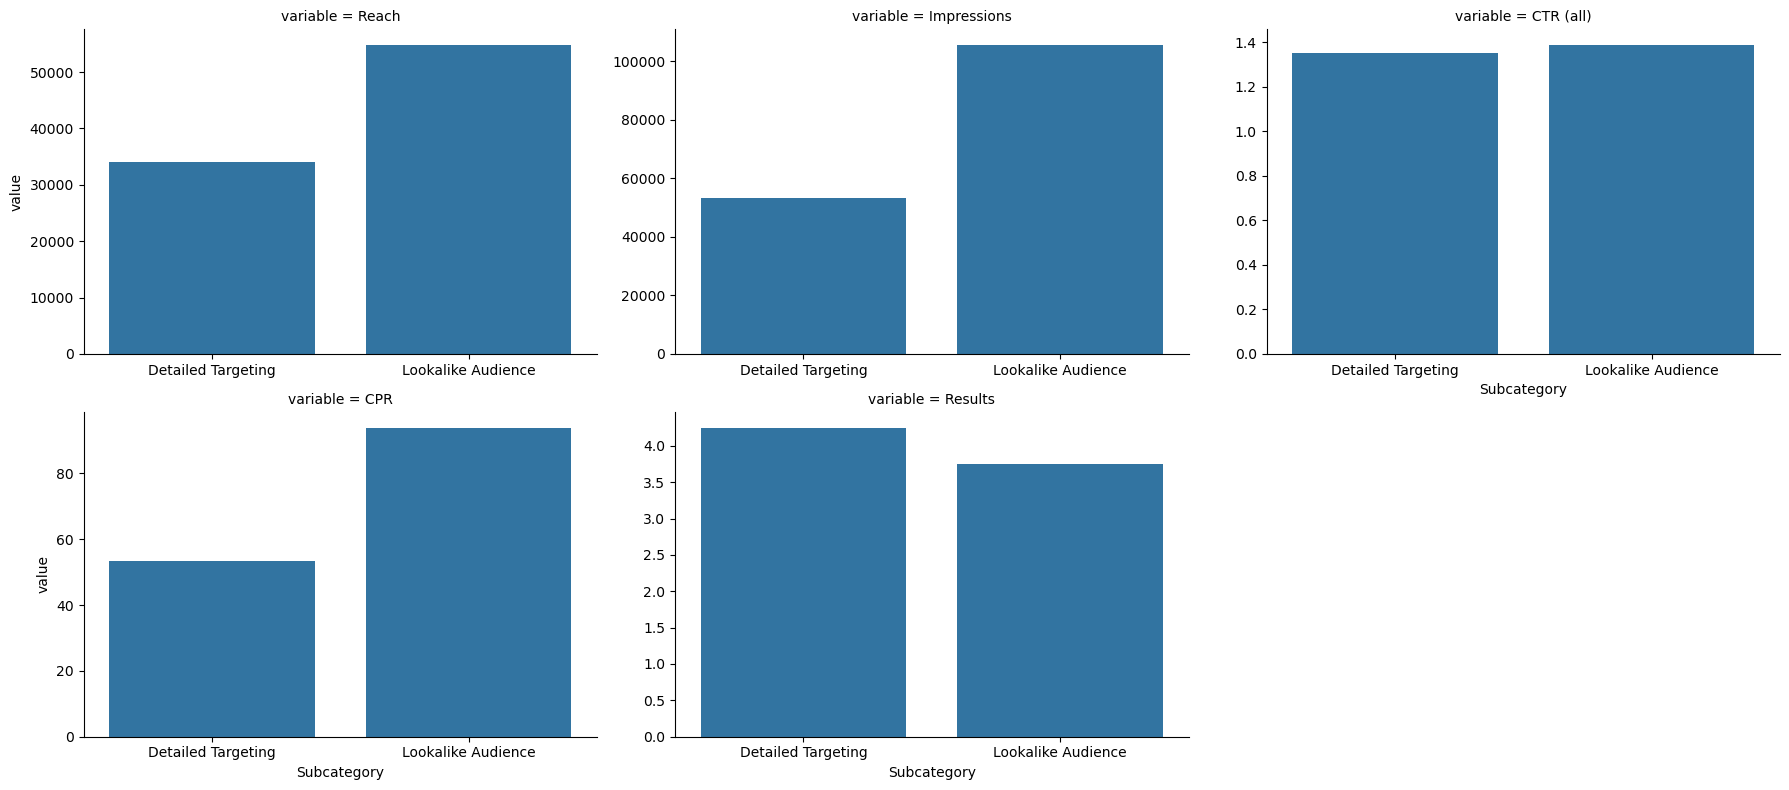

In [26]:
viz = sns.FacetGrid(df_transformed, col='variable', col_wrap=3, sharex=False, sharey=False, height=4, aspect=1.5)

viz.map(sns.barplot,'Subcategory', 'value', order=df_cold.reset_index()['Subcategory'])

plt.show()

Analysis
1. in reach and impression, LLA is significant higher than DT, as it is broader concept
2. CTR(all) isn't much different, both group seems to be engaging equally
3. DT audience converting result seems to be slightly more than LLA
4. in CPR, the DT is more cost efficient to acquire, they cost around 50 and LLA cost around 90

Conclusion
1. Even though LLA are larger in size and generate more ad impressions, DT are still more likely to convert
2. should focus more on LLA ad sets for more brand visibility
3. DT seems like a preferable option for conversion compaign

## Detailed Ad Set Analysis

performance of individual hot Ad set

### HOT

In [27]:
df_hot = df[df['Category']=='Hot']
df_hot = df_hot.reset_index()

#### Top funnel Metrics

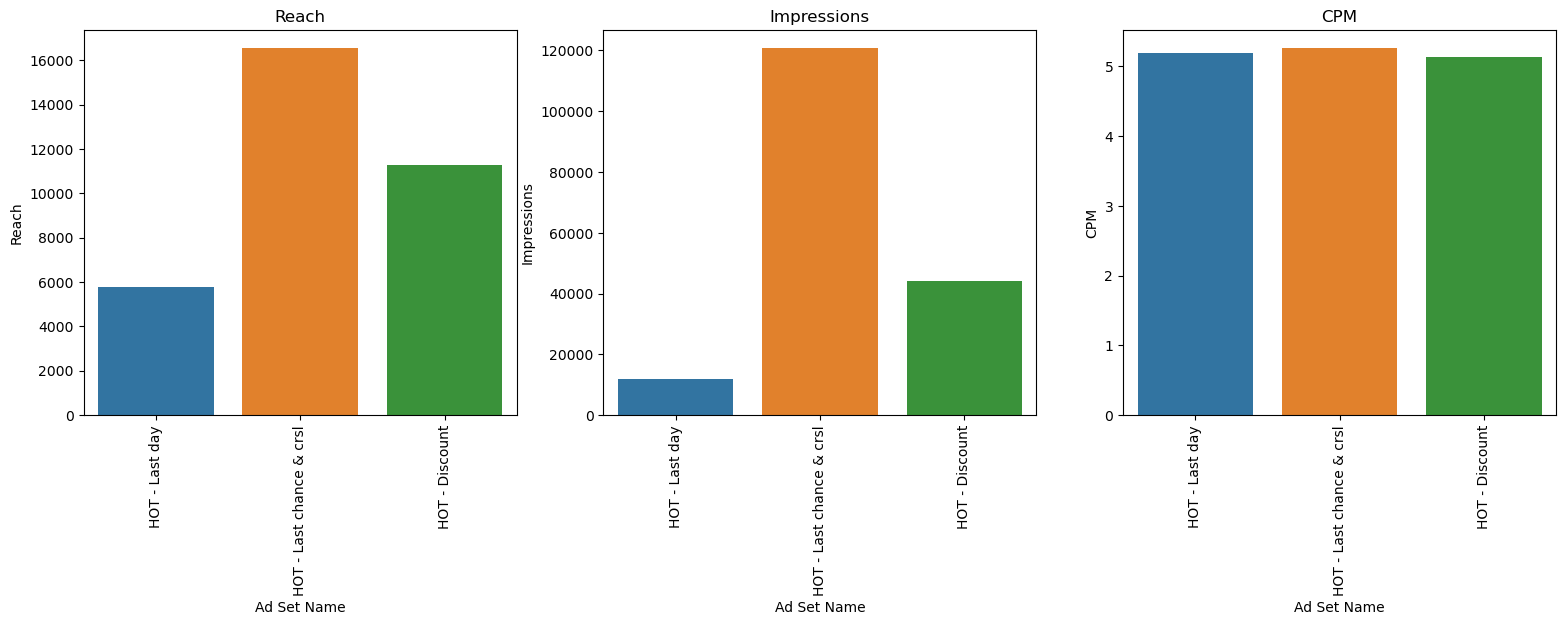

In [28]:
def top_funnel_metrics(df):
    fig, axs = plt.subplots(1, 3, figsize=(19,5))
    
    sns.barplot(x='Ad Set Name', y='Reach', data=df, ax=axs[0])
    axs[0].set_title('Reach')
    
    sns.barplot(x='Ad Set Name', y='Impressions', data=df, ax=axs[1])
    axs[1].set_title('Impressions')
    
    sns.barplot(x='Ad Set Name', y='CPM', data=df, ax=axs[2])
    axs[2].set_title('CPM')
    
    for ax in axs:
        for label in ax.get_xticklabels():
            label.set_rotation(90)
            
    plt.show()
    
top_funnel_metrics(df_hot)

second hot ad set perform best for reach and impression,the cpm all three ad sets look same with the cost of around 5euro per thousand

#### Mid funnel Metrics

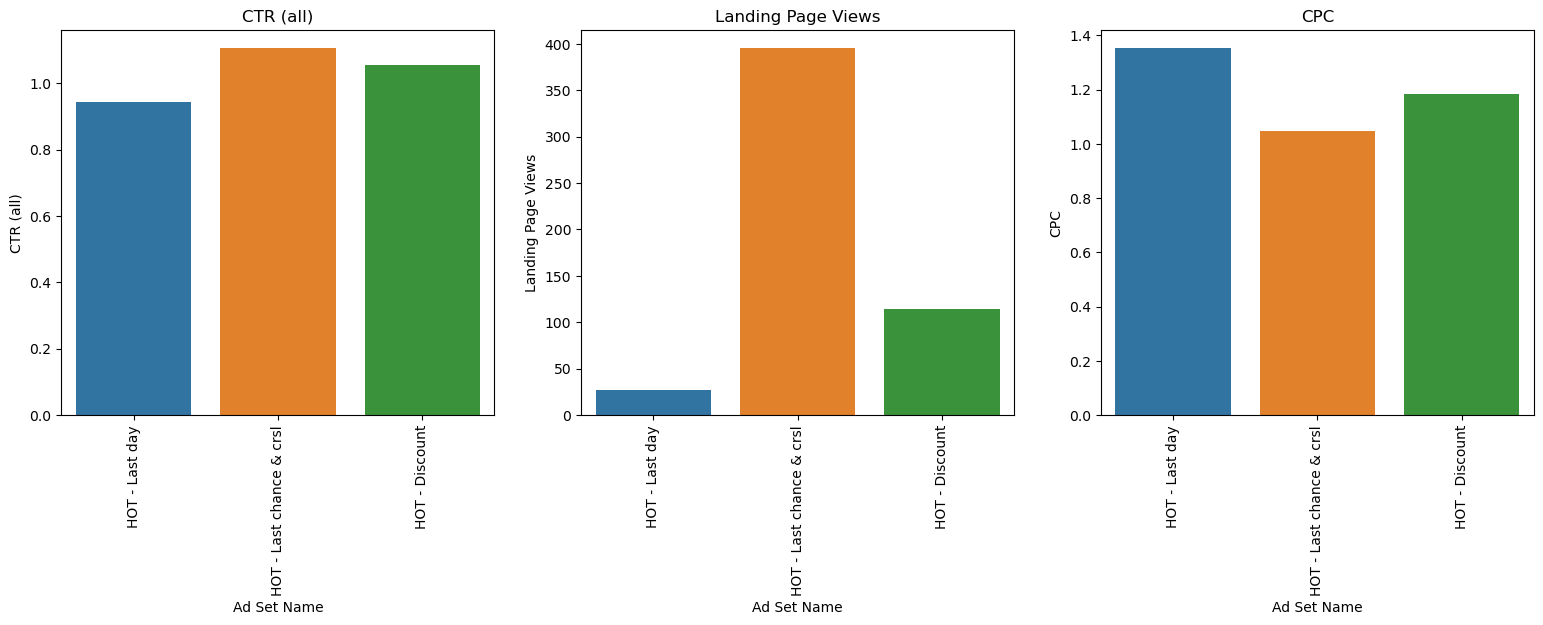

In [29]:
def mid_funnel_metrics(df):
    fig, axs = plt.subplots(1, 3, figsize=(19,5))
    
    sns.barplot(x='Ad Set Name', y='CTR (all)', data=df, ax=axs[0])
    axs[0].set_title('CTR (all)')
    
    sns.barplot(x='Ad Set Name', y='Landing Page Views', data=df, ax=axs[1])
    axs[1].set_title('Landing Page Views')
    
    sns.barplot(x='Ad Set Name', y='CPC', data=df, ax=axs[2])
    axs[2].set_title('CPC')
    
    for ax in axs:
        for label in ax.get_xticklabels():
            label.set_rotation(90)
    
    plt.show()
    
mid_funnel_metrics(df_hot)

second ad set stands out again in terms of engagement, generate the highest click-through-rate and landing page views, which also holds the lowest CPC means we are paying less on this ads to get people click on this ads. However, as this is a conversion campaign, our KPI is centered around getting highest number of purchases, so we are paying less attention on impressions and engagement.

#### Bottom funnel Metrics

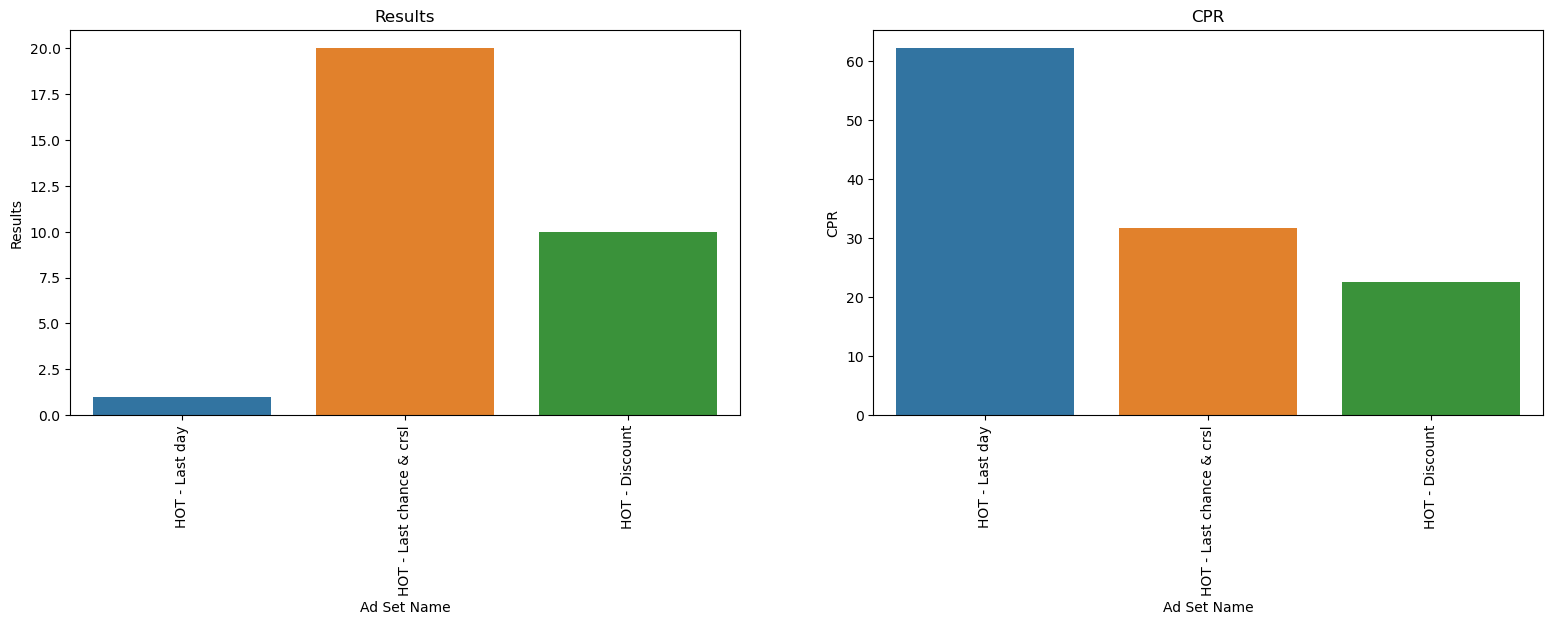

In [30]:
def bottom_funnel_metrics(df):
    fig, axs = plt.subplots(1, 2, figsize=(19,5))
    
    sns.barplot(x='Ad Set Name', y='Results', data=df, ax=axs[0])
    axs[0].set_title('Results')
    
    sns.barplot(x='Ad Set Name', y='CPR', data=df, ax=axs[1])
    axs[1].set_title('CPR')
    
    for ax in axs:
        for label in ax.get_xticklabels():
            label.set_rotation(90)
    
    plt.show()
    
bottom_funnel_metrics(df_hot)

last chance has most results among all hot ad sets, it is reasonable as more impression and clicks lead to more purchases. For CPR, the hot discount ad sets is the most cost efficient one as it only cost about 22 euro per conversion for this conversion campaign. The hot-last day ad set is by far the worst perform in terms of both conversions and cost per result, so it might make sense to pause it and reallocate campaign budget.

<Axes: xlabel='Ad Set Name', ylabel='Amount Spent'>

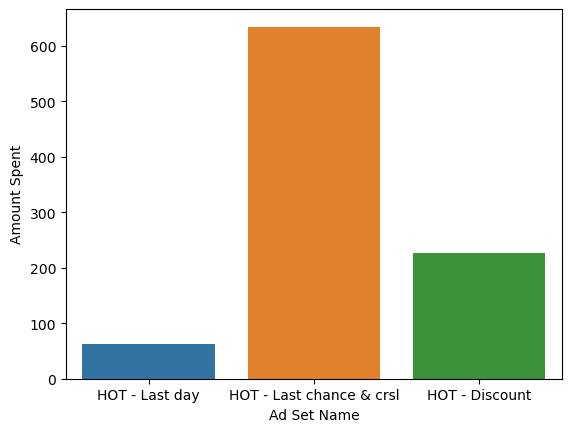

In [31]:
# total amount
sns.barplot(x='Ad Set Name', y='Amount Spent', data=df_hot)

may take some budget from the last day ad set to the discount ad set, which might give more result on lower cost

### Warm

In [32]:
df_warm = df[df['Category']=='Warm']
df_warm = df_warm.reset_index()

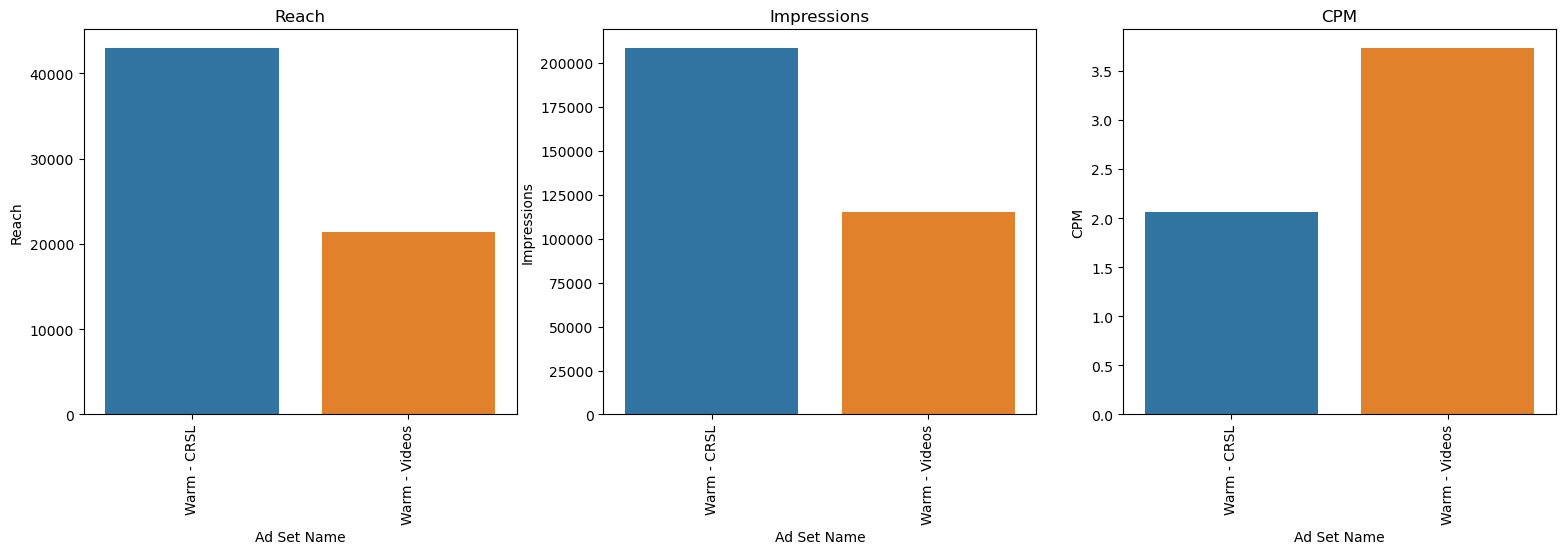

In [33]:
top_funnel_metrics(df_warm)

crsl seems performs better on reach impressions and cpm

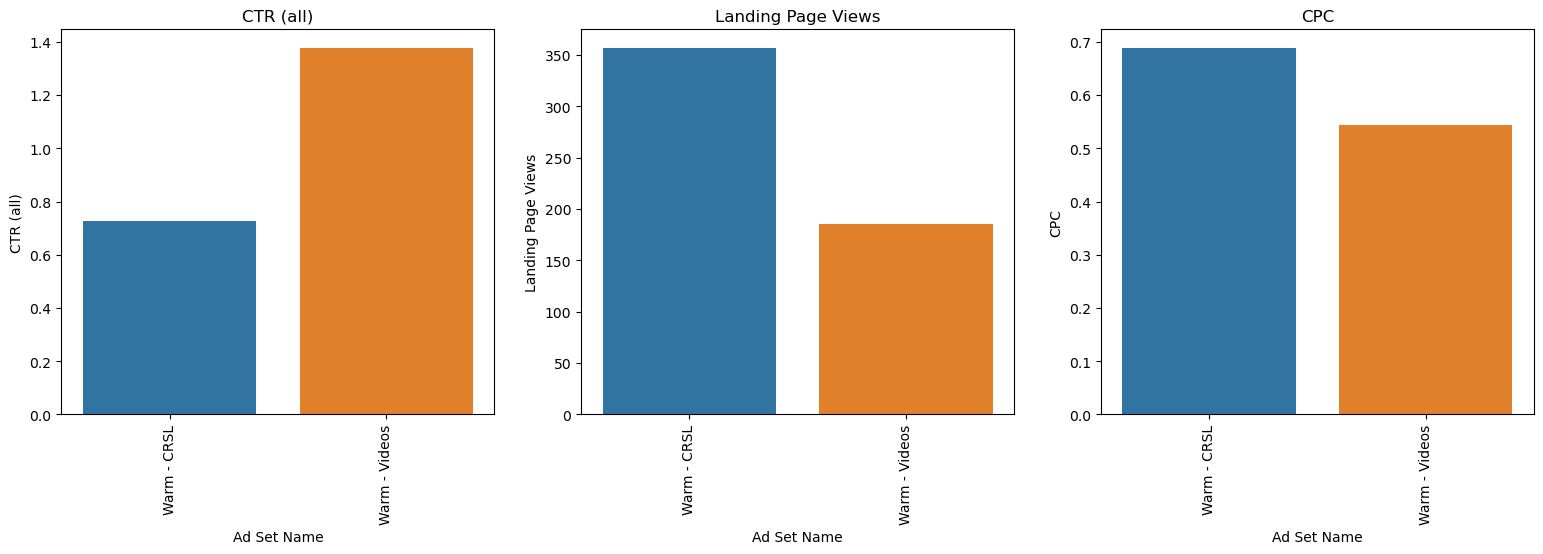

In [34]:
mid_funnel_metrics(df_warm)

slightly different from the top matrics, the video ad set has higher click through rate and lower cost per click. Overall the customer is more engaged with the video ad set, even it is not reach as many people as crsl did.

<Axes: xlabel='Ad Set Name', ylabel='Link Clicks'>

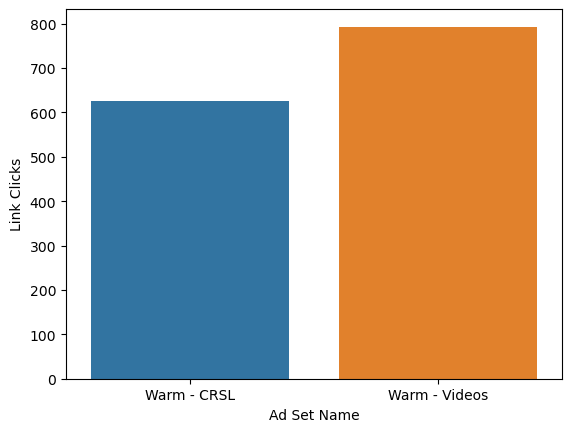

In [35]:
sns.barplot(x='Ad Set Name', y='Link Clicks', data = df_warm)

1. the video ad set even has more link clicks
2. video ad set - from 800 link clicks to 200 landing page clicks nearly 75% drop,assumption:
    1. wrongly click on and then clicked away before the landing page load completely
    2. ppl interested in the ad and click on it but when direct to the landing page they realize it is not what they expect to see so they close it immediately
    3. ads in this ad set has a broken landing page link so ppl won;t make it to the site although they were interested in the ad

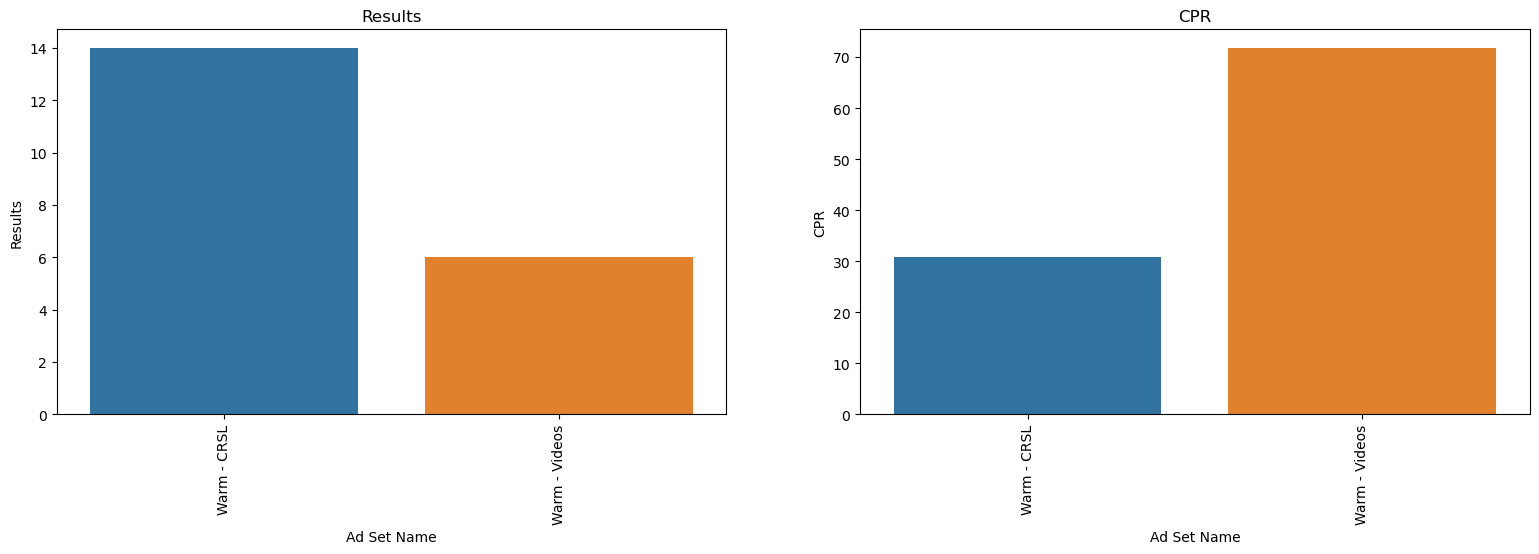

In [36]:
bottom_funnel_metrics(df_warm)

1. CRSL ad set has the most result of conversions and it looks far more cost efficient as it drive more result at a lower CPR
2. holds off for the video ad set as it has lower landing page views, it may affect by the landing page issue so keep it for further observation.keep investigate on why it has such drop off from link clicks to landing page views

### Cold

In [37]:
df_cold = df[df['Category']=='Cold']
df_cold = df_cold.reset_index()

In [44]:
def all_cold_adsets(df, metrics, ad_set_types=['Lookalike Audience','Detailed Targeting']):
    
    fig, axes = plt.subplots(nrows=len(metrics), ncols=len(ad_set_types), figsize=(12,11), sharey='row')
    
    for i, metric in enumerate(metrics):
        for j, ad_set_type in enumerate(ad_set_types):
            filtered_df = df[df['Subcategory']==ad_set_type]
            ax = axes[i,j]
            sns.barplot(x='Ad Set Name', y=metric, data=filtered_df, ax=ax)
            ax.set_title(f'{metric}-{ad_set_type}')
            ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
            
    plt.tight_layout()
    plt.show()

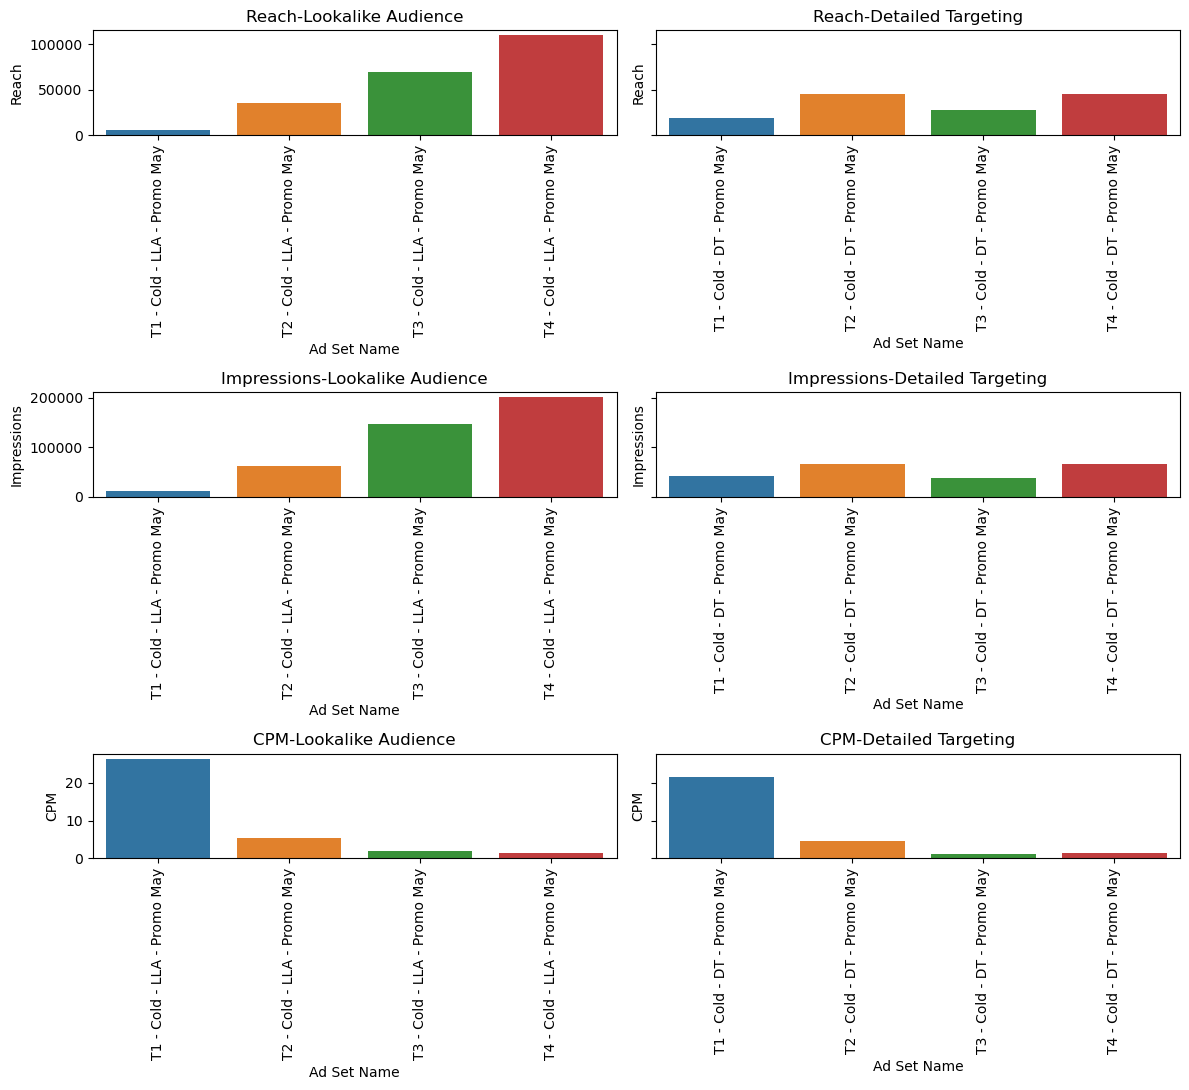

In [45]:
top_funnel_metrics= ['Reach', 'Impressions', 'CPM']
all_cold_adsets(df_cold,top_funnel_metrics)

1. in LLA, T3+T4 perform best as it reach most ppl, similar trend for the impressions 
2. between the DT, T2/T4 has the largest reach
3. in LLA, the t1 ad set perform worst in terms of low reach, low impressions, and incrediably high CPM
4. as we previously observed the LLA ad sets are bringing in more awareness than DT

#### Mid funnel Metrics

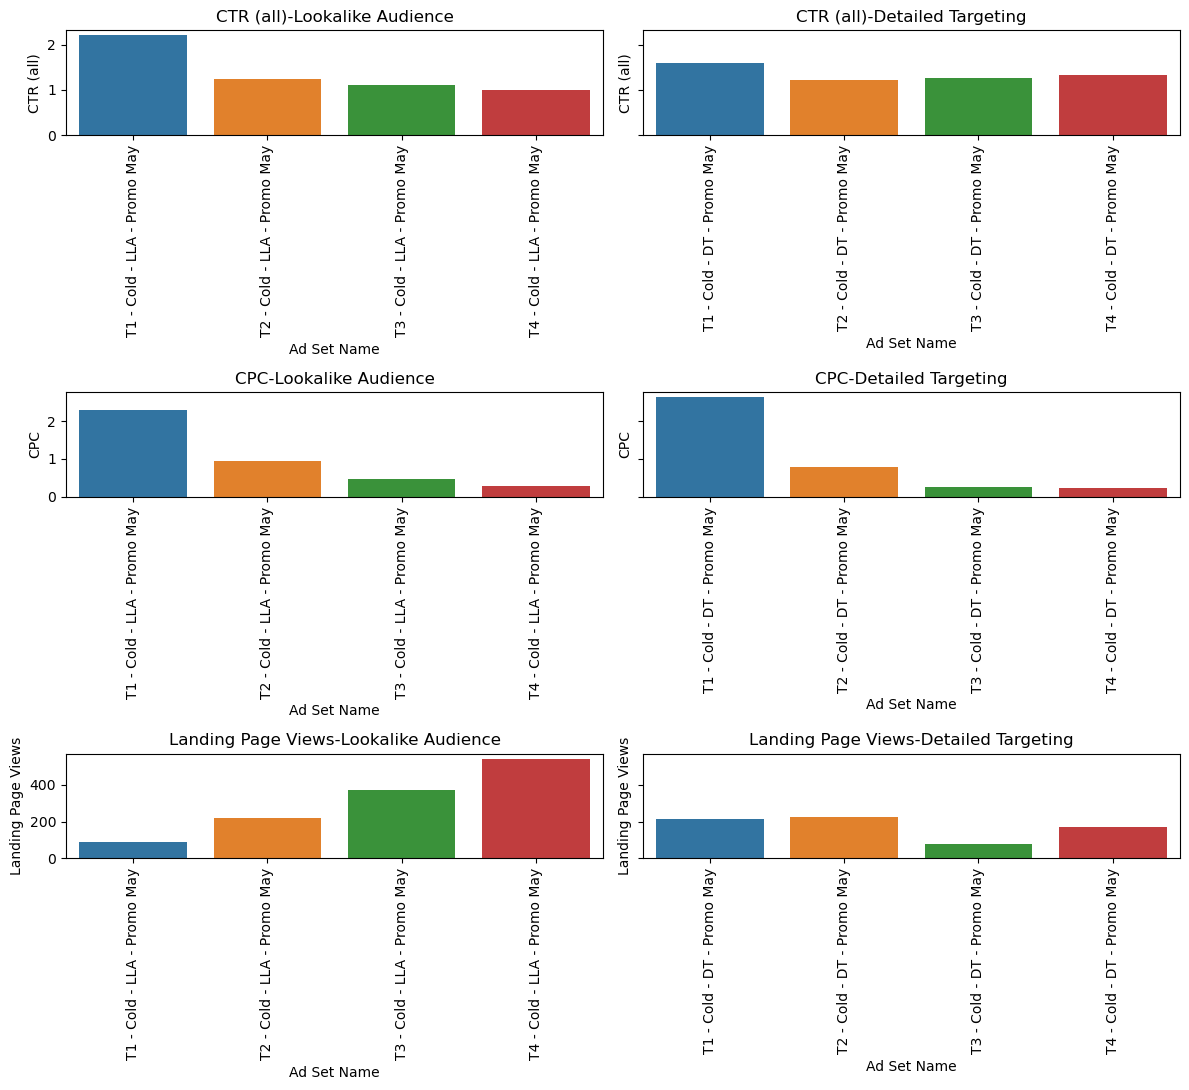

In [47]:
mid_funnel_metrics = ['CTR (all)','CPC','Landing Page Views']
all_cold_adsets(df_cold, mid_funnel_metrics)

1. ctr, equally likely, T1 stands out for both LLM and DT, but has a high cost of engagement, not reach enough people
2. T3/T4 appears the most cost effective lookalike ad sets, with most landing page views and lower cpc
3. T1/T2 reach fewer people and expensive --> audience displayed more interest
4. T3/T4 reach many people with low cost --> got a lot of views due to high reach
5. balance between volumn and quality

#### Bottum funnel Metrics

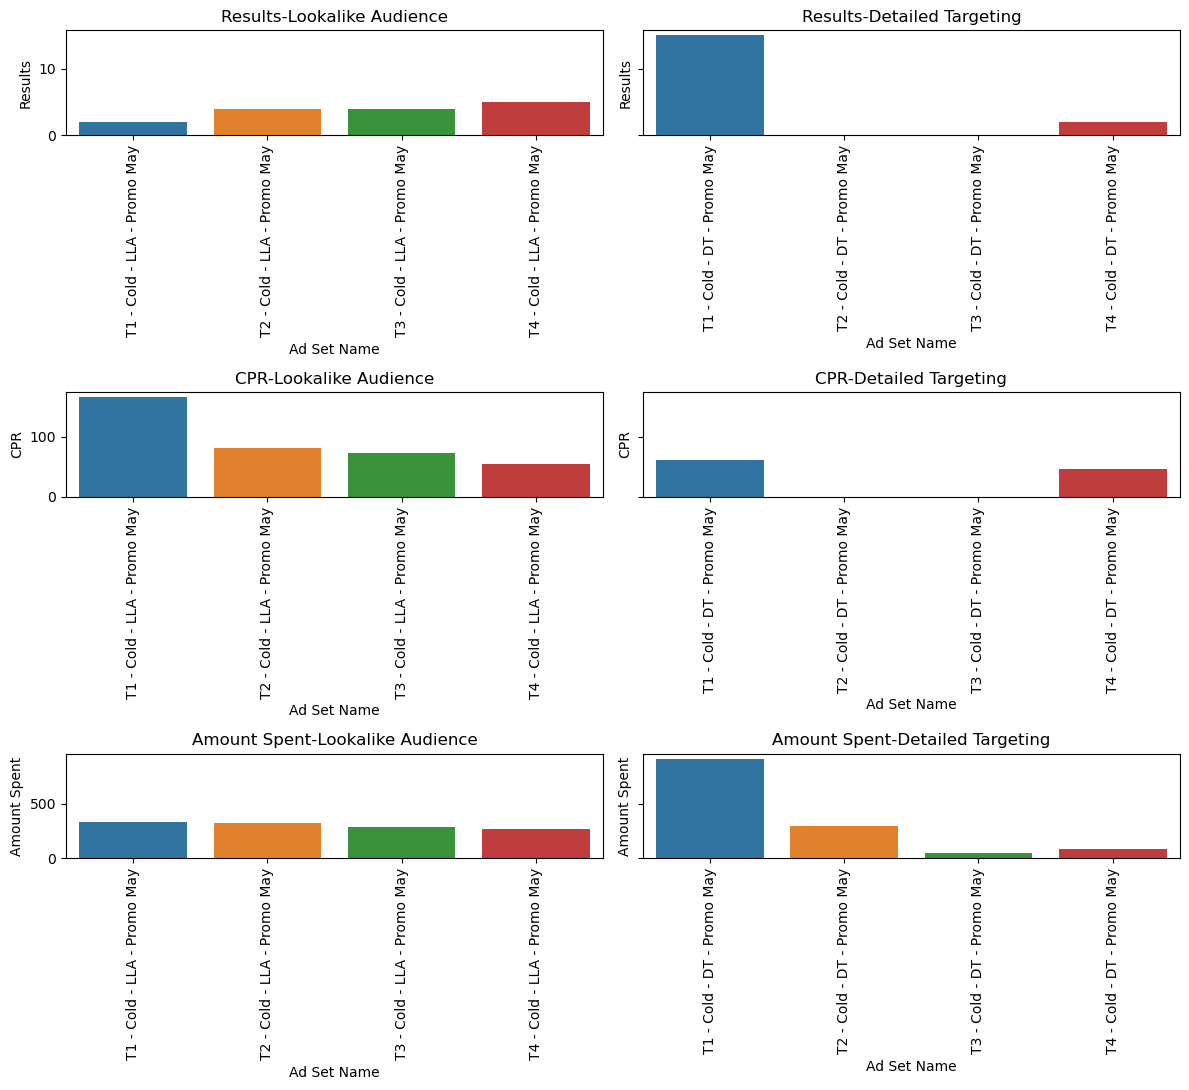

In [48]:
bottom_funnel_metrics = ['Results','CPR','Amount Spent']
all_cold_adsets(df_cold, bottom_funnel_metrics)

1. LLA T1/T2 did get conversion results
2. LLA T4 best performing adsets with highest result and lowest cost
3. DT T1 performs the best, 15 conversion, which actually has the lowest reach and impressions across the targeting adsets
4. audience must have been niche and of high quality
5. DT no result from T2/T3, might already paused the 2 adsets and reallocated to other
6. although T1 draw most result but T4's result seems not that different, the amount spent on T4(90 for 2) is significantly lower than T1(1000 for 15), may reallocate budget from T1 to T4 and test performance